# Automatic sleep staging

In [1]:
import yasa
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.25)

In [2]:
# Load EEG data
f = np.load('data_full_6hrs_100Hz_Cz+Fz+Pz.npz')
data, ch_names = f['data'], f['chan']
sf = 100.
# Keep only Cz
eeg = data[0, :]

# Load hypnogram
hypno_30s = np.loadtxt('data_full_6hrs_100Hz_hypno_30s.txt')

In [3]:
metadata=None
metadata = dict(age=25, male=1)

sls = yasa.SleepStaging(eeg, sf, metadata=metadata)
features = sls.get_features()
features

,age,eeg_10p,eeg_10p_norm,eeg_10p_rollavg_c5min_norm,eeg_90p,eeg_90p_norm,eeg_90p_rollavg_c5min_norm,eeg_absmean,eeg_absmean_norm,eeg_absmean_rollavg_c5min_norm,...,eeg_skew_rollavg_c5min_norm,eeg_std,eeg_std_norm,eeg_std_rollavg_c5min_norm,eeg_theta,eeg_theta_norm,eeg_theta_rollavg_c5min_norm,male,time_hour,time_norm
epoch,,,,,,,,,,,,,,,,,,,,,
0,25,-16.576703,0.143105,0.066934,15.098660,-0.209097,-0.006687,10.528260,-0.213889,-0.030864,...,0.209874,14.582990,-0.274240,-0.033482,0.154421,0.300625,0.063564,1,0.000000,0.000000
1,25,-17.762941,0.121795,0.089341,19.840257,-0.123599,-0.043003,12.628918,-0.154628,-0.068956,...,0.247674,18.015102,-0.203652,-0.088998,0.152448,0.289035,0.056790,1,0.008333,0.001391
2,25,-24.851416,-0.005542,0.105954,28.093591,0.025220,-0.066854,18.453050,0.009674,-0.096054,...,0.262222,27.343423,-0.011794,-0.129127,0.073700,-0.173576,0.048737,1,0.016667,0.002782
3,25,-45.437530,-0.375351,0.118854,66.178878,0.711953,-0.087748,43.082556,0.704485,-0.117277,...,0.287004,78.372686,1.037733,-0.159539,0.088154,-0.088663,0.067617,1,0.025000,0.004172
4,25,-15.052247,0.170490,0.135100,14.748684,-0.215408,-0.109215,9.097130,-0.254262,-0.139797,...,0.296569,11.491974,-0.337814,-0.190299,0.107109,0.022690,0.119396,1,0.033333,0.005563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,25,-16.740858,0.140156,0.123483,17.371563,-0.168114,-0.129174,10.770606,-0.207052,-0.172468,...,0.319924,13.912886,-0.288023,-0.260764,0.190521,0.512697,0.315349,1,5.958333,0.994437
716,25,-14.324198,0.183569,0.109735,14.879173,-0.213055,-0.112573,9.171010,-0.252178,-0.156870,...,0.312352,11.866069,-0.330120,-0.242240,0.170700,0.396254,0.300269,1,5.966667,0.995828
717,25,-14.793451,0.175139,0.097076,14.871885,-0.213186,-0.098537,9.155406,-0.252618,-0.142874,...,0.317840,11.747345,-0.332562,-0.223695,0.155414,0.306459,0.305259,1,5.975000,0.997218


<AxesSubplot:xlabel='epoch'>

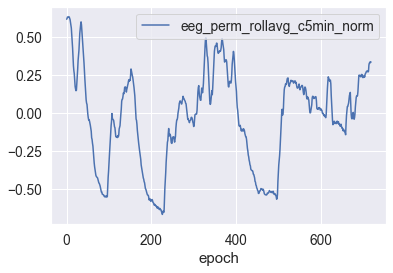

In [4]:
features.plot(y='eeg_perm_rollavg_c5min_norm')

### Predict and validate

In [5]:
cdir = "/Volumes/JAWA/SHERLOCK/classifiers/"
path_to_model = cdir + "clf_eeg+meta_lgb.joblib"

In [6]:
y_true = yasa.hypno_int_to_str(hypno_30s)
y_pred = sls.predict(path_to_model)
y_true, y_pred

(array(['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N1', 'N1',
        'N1', 'N1', 'N1', 'N1', 'N1', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
        'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'W', 'W', 'W', 'W', 'W', 'W',
        'W', 'W', 'W', 'W', 'W', 'N1', 'N1', 'N1', 'N1', 'N2', 'N2', 'N2',
        'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
        'N2', 'N2', 'N2', 'N2', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
        'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
        'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
        'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
        'N3', 'N3', 'N3', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
        'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
        'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
        'N2', 'N2', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
        'R', 'R', 'R', 'R', 'R', 'R

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

          N1       0.00      0.00      0.00        22
          N2       0.80      0.75      0.78       318
          N3       0.88      0.95      0.91       182
           R       0.85      0.72      0.78       155
           W       0.35      0.72      0.47        43

    accuracy                           0.77       720
   macro avg       0.58      0.63      0.59       720
weighted avg       0.78      0.77      0.77       720



In [8]:
# Predict the probability associated with each sleep stage
proba = sls.predict_proba(path_to_model)
proba.head()

,N1,N2,N3,R,W
epoch,,,,,
0,0.007655,0.002941,0.000074,0.000749,0.988582
1,0.006749,0.004397,0.000153,0.000935,0.987765
2,0.001298,0.002164,0.000520,0.000260,0.995758
3,0.000664,0.002006,0.000258,0.000138,0.996934
4,0.013720,0.002914,0.000059,0.000844,0.982463


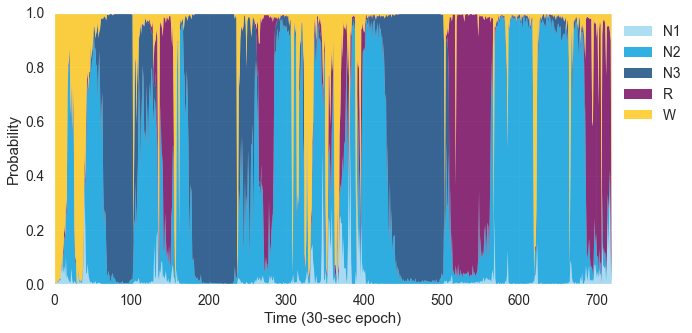

In [9]:
# Plot the predicted probability
sls.plot_predict_proba();

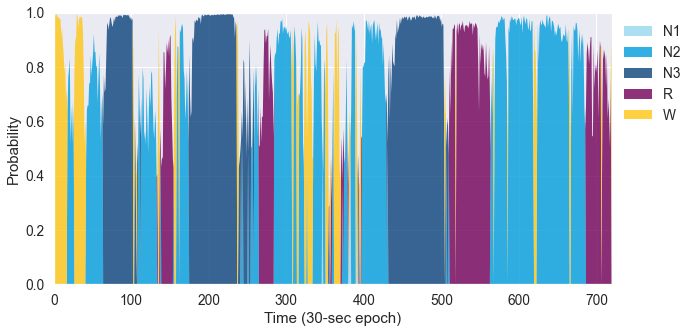

In [10]:
# Same but only showing the majority class
sls.plot_predict_proba(majority_only=True);

<AxesSubplot:xlabel='Time (30-sec epoch)', ylabel='Probability'>

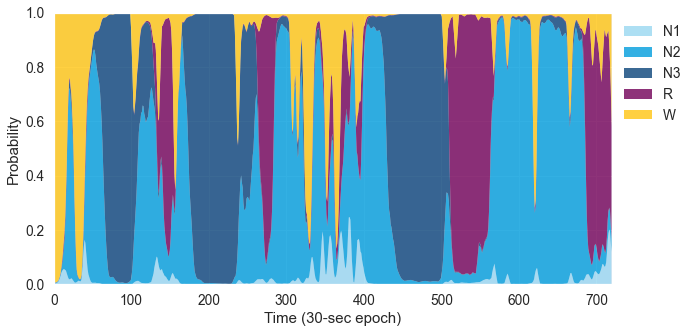

In [11]:
# Smooth the probability using a 3 min 30 centered rolling average
proba_smooth = sls.predict_proba(path_to_model, smooth=True)
sls.plot_predict_proba(proba_smooth)

In [12]:
# Return the smoothed sleep stages predictions
y_pred_smooth = sls.predict(path_to_model, smooth=True)
print(classification_report(y_true, y_pred_smooth))

              precision    recall  f1-score   support

          N1       0.00      0.00      0.00        22
          N2       0.81      0.78      0.80       318
          N3       0.86      0.97      0.91       182
           R       0.89      0.72      0.79       155
           W       0.38      0.74      0.50        43

    accuracy                           0.79       720
   macro avg       0.59      0.64      0.60       720
weighted avg       0.79      0.79      0.78       720



/Users/raphael/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
